# NumPy応用

In [1]:
from __future__ import division
from numpy.random import randn
from pandas import Series
import numpy as np
np.set_printoptions(precision=4)
import sys

In [3]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
print(type(arr1))

<type 'numpy.ndarray'>


In [21]:
#1個飛ばしと2個飛ばしのスライス
arr1 = np.array([[1, 2, 3,4, 5, 6], [1, 2, 3,4, 5, 6]])
print(arr1[0][::2])
print(arr1[1][::3])

[1 3 5]
[1 4]


ndarryの強力な機能のひとつは、配列オブジェクトがすべてデータの塊のストライドビューであること。

ストライド（歩幅情報）を持ってるので幅を変えながらメモリ内の配列を移動できる。

## ndarray オブジェクトの内部構造

### NumPy dtype の階層構造

In [24]:
ints = np.ones(10, dtype=np.uint16)
floats = np.ones(10, dtype=np.float32)
#int16 int32の親はnp.integer。issubdtypeで型チェックできる
np.issubdtype(ints.dtype, np.integer)
np.issubdtype(floats.dtype, np.floating)

True

In [23]:
#特定の型の親クラスをすべてみる。objectがルート。
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

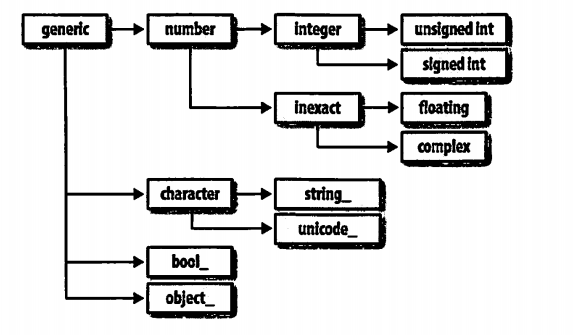

## 配列の操作：応用

### 配列の再形成

In [35]:
arr = np.arange(8)
arr
arr.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [36]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [37]:
arr = np.arange(15)
arr.reshape((5, -1)) #-1は自動でやってくれてる

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [38]:
other_arr = np.ones((3, 5))
other_arr.shape
arr.reshape(other_arr.shape)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [39]:
arr = np.arange(15).reshape((5, 3))
arr
arr.ravel() #flattenとの違いは後ででてくる

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [40]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### C と Fortran の順列の違い

In [42]:
arr = np.arange(12).reshape((3, 4))
print(arr)
print(arr.ravel())
print(arr.ravel('F'))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  4  8  1  5  9  2  6 10  3  7 11]


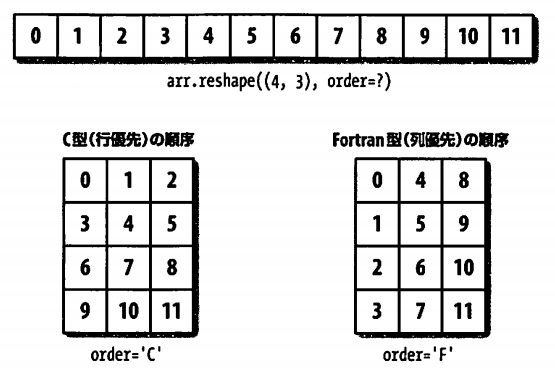

### 配列の連結と分割

In [44]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
print(np.concatenate([arr1, arr2], axis=0))
print(np.concatenate([arr1, arr2], axis=1))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [45]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [46]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [47]:
from numpy.random import randn
arr = randn(5, 2)
arr
first, second, third = np.split(arr, [1, 3])
first
second
third

array([[ -1.0747e+00,  -6.5000e-01],
       [  1.7780e+00,  -1.6128e-03]])

#### Stacking helpers: 

In [75]:
arr = np.arange(6)
arr1 = arr.reshape((3, 2))
arr2 = randn(3, 2)
np.r_[arr1, arr2]
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.    ,  1.    ,  0.    ],
       [ 2.    ,  3.    ,  1.    ],
       [ 4.    ,  5.    ,  2.    ],
       [ 0.4579, -0.7374,  3.    ],
       [-1.7878,  0.173 ,  4.    ],
       [-0.6224,  0.4062,  5.    ]])

In [76]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

### 要素の繰り返し: tile と repeat

In [77]:
arr = np.arange(3)
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [78]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [79]:
arr = randn(2, 2)
arr


array([[ 0.1053,  0.1276],
       [ 1.2069, -0.1052]])

In [80]:
arr.repeat(2, axis=0)

array([[ 0.1053,  0.1276],
       [ 0.1053,  0.1276],
       [ 1.2069, -0.1052],
       [ 1.2069, -0.1052]])

In [81]:
arr.repeat([2, 3], axis=0)

array([[ 0.1053,  0.1276],
       [ 0.1053,  0.1276],
       [ 1.2069, -0.1052],
       [ 1.2069, -0.1052],
       [ 1.2069, -0.1052]])

In [82]:
arr.repeat([2, 3], axis=1)

array([[ 0.1053,  0.1053,  0.1276,  0.1276,  0.1276],
       [ 1.2069,  1.2069, -0.1052, -0.1052, -0.1052]])

In [83]:
arr

array([[ 0.1053,  0.1276],
       [ 1.2069, -0.1052]])

In [84]:
np.tile(arr, 2)

array([[ 0.1053,  0.1276,  0.1053,  0.1276],
       [ 1.2069, -0.1052,  1.2069, -0.1052]])

In [85]:
np.tile(arr, (2, 1))

array([[ 0.1053,  0.1276],
       [ 1.2069, -0.1052],
       [ 0.1053,  0.1276],
       [ 1.2069, -0.1052]])

In [86]:
np.tile(arr, (3, 2))

array([[ 0.1053,  0.1276,  0.1053,  0.1276],
       [ 1.2069, -0.1052,  1.2069, -0.1052],
       [ 0.1053,  0.1276,  0.1053,  0.1276],
       [ 1.2069, -0.1052,  1.2069, -0.1052],
       [ 0.1053,  0.1276,  0.1053,  0.1276],
       [ 1.2069, -0.1052,  1.2069, -0.1052]])

### ファンシーインデックス参照の別法: take と put

In [87]:
arr = np.arange(10) * 100
inds = [7, 1, 2, 6]
arr[inds]

array([700, 100, 200, 600])

In [88]:
arr.take(inds)
arr.put(inds, 42)
arr
arr.put(inds, [40, 41, 42, 43])
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

In [89]:
inds = [2, 0, 2, 1]
arr = randn(2, 4)
arr
arr.take(inds, axis=1)

array([[-0.2508, -1.4025, -0.2508,  0.5266],
       [-0.2151, -1.1228, -0.2151, -0.5066]])

## ブロードキャスト

In [90]:
arr = np.arange(5)
arr
arr * 4

array([ 0,  4,  8, 12, 16])

In [91]:
arr = randn(4, 3)
arr.mean(0)
demeaned = arr - arr.mean(0)
demeaned
demeaned.mean(0)

array([ -5.5511e-17,  -2.7756e-17,  -5.5511e-17])

In [92]:
arr
row_means = arr.mean(1)
row_means.reshape((4, 1))
demeaned = arr - row_means.reshape((4, 1))
demeaned.mean(1)

array([  0.0000e+00,   3.7007e-17,   3.7007e-17,   0.0000e+00])

### 他の軸へのブロードキャスト

In [94]:
arr - arr.mean()

array([[-0.2812,  0.6407, -0.8288],
       [ 0.714 , -0.8032,  0.4892],
       [-1.23  ,  0.2361, -0.7151],
       [ 1.3363, -1.27  ,  1.7119]])

In [95]:
arr - arr.mean(1).reshape((4, 1))

array([[-0.1247,  0.7972, -0.6724],
       [ 0.5807, -0.9365,  0.3559],
       [-0.6603,  0.8058, -0.1454],
       [ 0.7436, -1.8627,  1.1191]])

In [96]:
arr = np.zeros((4, 4))
arr_3d = arr[:, np.newaxis, :]
arr_3d.shape

(4, 1, 4)

In [97]:
arr_1d = np.random.normal(size=3)
arr_1d[:, np.newaxis]
arr_1d[np.newaxis, :]

array([[ 0.4862,  0.1918, -0.611 ]])

In [98]:
arr = randn(3, 4, 5)
depth_means = arr.mean(2)
depth_means
demeaned = arr - depth_means[:, :, np.newaxis]
demeaned.mean(2)

array([[ -4.4409e-17,   8.8818e-17,   8.8818e-17,   1.1102e-17],
       [ -9.4369e-17,   4.4409e-17,  -6.6613e-17,   0.0000e+00],
       [  0.0000e+00,   0.0000e+00,  -1.1102e-17,  -1.6653e-17]])

In [99]:
def demean_axis(arr, axis=0):
    means = arr.mean(axis)

    # This generalized things like [:, :, np.newaxis] to N dimensions
    indexer = [slice(None)] * arr.ndim
    indexer[axis] = np.newaxis
    return arr - means[indexer]

### ブロードキャストでの配列への値の設定

In [100]:
arr = np.zeros((4, 3))
arr[:] = 5
arr

array([[ 5.,  5.,  5.],
       [ 5.,  5.,  5.],
       [ 5.,  5.,  5.],
       [ 5.,  5.,  5.]])

In [101]:
col = np.array([1.28, -0.42, 0.44, 1.6])
arr[:] = col[:, np.newaxis]
arr
arr[:2] = [[-1.37], [0.509]]
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])

## ufuncの使い方：応用

### Ufunc インスタンス　メソッド

ユニバーサル関数（Ufunc）。要素間の高速な操作。ループを使わずに書ける。


In [110]:
arr = np.arange(10)
np.add.reduce(arr)
arr.sum()

45

In [103]:
np.random.seed(12346)

In [104]:
arr = randn(5, 5)
arr[::2].sort(1) # sort a few rows
arr[:, :-1] < arr[:, 1:]
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1)

array([ True, False,  True, False,  True], dtype=bool)

In [105]:
arr = np.arange(15).reshape((3, 5))
np.add.accumulate(arr, axis=1)

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]])

In [106]:
arr = np.arange(3).repeat([1, 2, 2])
arr
np.multiply.outer(arr, np.arange(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8],
       [0, 2, 4, 6, 8]])

In [107]:
result = np.subtract.outer(randn(3, 4), randn(5))
result.shape

(3, 4, 5)

In [108]:
arr = np.arange(10)
np.add.reduceat(arr, [0, 5, 8])

array([10, 18, 17])

In [109]:
arr = np.multiply.outer(np.arange(4), np.arange(5))
arr
np.add.reduceat(arr, [0, 2, 4], axis=1)

array([[ 0,  0,  0],
       [ 1,  5,  4],
       [ 2, 10,  8],
       [ 3, 15, 12]])

### 独自定義の ufuncs

In [111]:
def add_elements(x, y):
    return x + y
add_them = np.frompyfunc(add_elements, 2, 1)
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

In [112]:
add_them = np.vectorize(add_elements, otypes=[np.float64])
add_them(np.arange(8), np.arange(8))

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.])

In [113]:
arr = randn(10000)
%timeit add_them(arr, arr)
%timeit np.add(arr, arr)

100 loops, best of 3: 2.61 ms per loop
The slowest run took 5.26 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.62 µs per loop


## 構造化配列とレコード配列

In [114]:
dtype = [('x', np.float64), ('y', np.int32)]
sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)
sarr

array([( 1.5   ,  6), ( 3.1416, -2)],
      dtype=[('x', '<f8'), ('y', '<i4')])

In [115]:
sarr[0]
sarr[0]['y']

6

In [116]:
sarr['x']

array([ 1.5   ,  3.1416])

### ネストした dtypes と 多次元フィールド

In [117]:
dtype = [('x', np.int64, 3), ('y', np.int32)]
arr = np.zeros(4, dtype=dtype)
arr

array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)],
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])

In [118]:
arr[0]['x']

array([0, 0, 0])

In [119]:
arr['x']

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [120]:
dtype = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]
data = np.array([((1, 2), 5), ((3, 4), 6)], dtype=dtype)
data['x']
data['y']
data['x']['a']

array([ 1.,  3.])

### 構造化配列を使う理由

### 構造化配列の操作: numpy.lib.recfunctions

## ソートについて詳しく

In [121]:
arr = randn(6)
arr.sort()
arr

array([-1.082 ,  0.3759,  0.8014,  1.1397,  1.2888,  1.8413])

In [122]:
arr = randn(3, 5)
arr
arr[:, 0].sort()  # Sort first column values in-place
arr

array([[-1.0111, -1.4711,  0.8705, -0.0847, -1.1329],
       [-0.3318, -0.3436,  2.1714,  0.1234, -0.0189],
       [ 0.1773,  0.7424,  0.8548,  1.038 , -0.329 ]])

In [123]:
arr = randn(5)
arr
np.sort(arr)
arr

array([-1.1181, -0.2415, -2.0051,  0.7379, -1.0614])

In [124]:
arr = randn(3, 5)
arr
arr.sort(axis=1)
arr

array([[-0.2682, -0.1872,  0.5955,  0.9111,  1.3389],
       [-0.5168, -0.3215, -0.1989,  1.0054,  1.1925],
       [-1.7638, -0.2222, -0.2171,  0.3969,  0.6071]])

In [125]:
arr[:, ::-1]

array([[ 1.3389,  0.9111,  0.5955, -0.1872, -0.2682],
       [ 1.1925,  1.0054, -0.1989, -0.3215, -0.5168],
       [ 0.6071,  0.3969, -0.2171, -0.2222, -1.7638]])

### 間接ソート: argsort と lexsort

In [126]:
values = np.array([5, 0, 1, 3, 2])
indexer = values.argsort()
indexer
values[indexer]

array([0, 1, 2, 3, 5])

In [127]:
arr = randn(3, 5)
arr[0] = values
arr
arr[:, arr[0].argsort()]

array([[ 0.    ,  1.    ,  2.    ,  3.    ,  5.    ],
       [-0.1378,  2.1777,  0.8356, -0.4728, -0.3636],
       [ 0.2316,  0.728 ,  1.9956, -1.3918, -0.2089]])

In [128]:
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])
sorter = np.lexsort((first_name, last_name))
zip(last_name[sorter], first_name[sorter])

[('Arnold', 'Jane'),
 ('Arnold', 'Steve'),
 ('Jones', 'Bill'),
 ('Jones', 'Bob'),
 ('Walters', 'Barbara')]

### 他のソートアルゴリズム

In [129]:
values = np.array(['2:first', '2:second', '1:first', '1:second', '1:third'])
key = np.array([2, 2, 1, 1, 1])
indexer = key.argsort(kind='mergesort')
indexer
values.take(indexer)

array(['1:first', '1:second', '1:third', '2:first', '2:second'],
      dtype='|S8')

### numpy.searchsorted: ソートされた配列内で要素を探す

In [130]:
arr = np.array([0, 1, 7, 12, 15])
arr.searchsorted(9)

3

In [131]:
arr.searchsorted([0, 8, 11, 16])

array([0, 3, 3, 5])

In [132]:
arr = np.array([0, 0, 0, 1, 1, 1, 1])
arr.searchsorted([0, 1])
arr.searchsorted([0, 1], side='right')

array([3, 7])

In [133]:
data = np.floor(np.random.uniform(0, 10000, size=50))
bins = np.array([0, 100, 1000, 5000, 10000])
data

array([ 8304.,  4181.,  9352.,  4907.,  3250.,  8546.,  2673.,  6152.,
        2774.,  5130.,  9553.,  4997.,  1794.,  9688.,   426.,  1612.,
         651.,  8653.,  1695.,  4764.,  1052.,  4836.,  8020.,  3479.,
        1513.,  5872.,  8992.,  7656.,  4764.,  5383.,  2319.,  4280.,
        4150.,  8601.,  3946.,  9904.,  7286.,  9969.,  6032.,  4574.,
        8480.,  4298.,  2708.,  7358.,  6439.,  7916.,  3899.,  9182.,
         871.,  7973.])

In [134]:
labels = bins.searchsorted(data)
labels

array([4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 2, 3, 2, 4, 3, 3, 3, 3, 4,
       3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4,
       3, 4, 2, 4])

In [135]:
Series(data).groupby(labels).mean()

2     649.333333
3    3411.521739
4    7935.041667
dtype: float64

In [136]:
np.digitize(data, bins)

array([4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 2, 3, 2, 4, 3, 3, 3, 3, 4,
       3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4,
       3, 4, 2, 4])

## NumPy の行列クラス

In [137]:
X =  np.array([[ 8.82768214,  3.82222409, -1.14276475,  2.04411587],
               [ 3.82222409,  6.75272284,  0.83909108,  2.08293758],
               [-1.14276475,  0.83909108,  5.01690521,  0.79573241],
               [ 2.04411587,  2.08293758,  0.79573241,  6.24095859]])
X[:, 0]  # one-dimensional
y = X[:, :1]  # two-dimensional by slicing
X
y

array([[ 8.8277],
       [ 3.8222],
       [-1.1428],
       [ 2.0441]])

In [138]:
np.dot(y.T, np.dot(X, y))

array([[ 1195.468]])

In [139]:
Xm = np.matrix(X)
ym = Xm[:, 0]
Xm
ym
ym.T * Xm * ym

matrix([[ 1195.468]])

In [140]:
Xm.I * X

matrix([[  1.0000e+00,  -1.3878e-16,  -5.8981e-17,   2.7756e-17],
        [  1.5266e-16,   1.0000e+00,   6.2450e-17,   2.7756e-17],
        [  1.1102e-16,   1.3878e-17,   1.0000e+00,   0.0000e+00],
        [  5.5511e-17,   1.1102e-16,   0.0000e+00,   1.0000e+00]])

## 配列の入出力：応用

### メモリマップファイル

In [141]:
mmap = np.memmap('mymmap', dtype='float64', mode='w+', shape=(10000, 10000))
mmap

memmap([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [142]:
section = mmap[:5]

In [143]:
section[:] = np.random.randn(5, 10000)
mmap.flush()
mmap
del mmap

In [144]:
mmap = np.memmap('mymmap', dtype='float64', shape=(10000, 10000))
mmap

memmap([[-0.1614, -0.1768,  0.422 , ..., -0.2195, -0.1256, -0.4012],
        [ 0.4898, -2.2219, -0.7684, ..., -2.3517, -1.0782,  1.3208],
        [-0.6875,  1.6901, -0.7444, ..., -1.4218, -0.0509,  1.2224],
        ..., 
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [145]:
%xdel mmap
!rm mymmap

### HDF5 and other array storage options

## パフォーマンスの小技

### 連続したメモリの重要さ

In [146]:
arr_c = np.ones((1000, 1000), order='C')
arr_f = np.ones((1000, 1000), order='F')
arr_c.flags
arr_f.flags
arr_f.flags.f_contiguous

True

In [147]:
%timeit arr_c.sum(1)
%timeit arr_f.sum(1)

1000 loops, best of 3: 654 µs per loop
1000 loops, best of 3: 736 µs per loop


In [148]:
arr_f.copy('C').flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [149]:
arr_c[:50].flags.contiguous
arr_c[:, :50].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [150]:
%xdel arr_c
%xdel arr_f
%cd ..

/Users/user/projects


## 高速化の選択肢: Cython, f2py, C

```cython
from numpy cimport ndarray, float64_t

def sum_elements(ndarray[float64_t] arr):
    cdef Py_ssize_t i, n = len(arr)
    cdef float64_t result = 0

    for i in range(n):
        result += arr[i]

    return result
```